In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import seaborn as sns

In [ ]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud

In [19]:
data_df=pd.read_csv('creditcard.csv')

In [20]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
data_df.shape

(284807, 31)

In [22]:
data_df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [23]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [25]:
null_columns=pd.DataFrame({'Columns':data_df.isna().sum().index,'No.  Null Values':data_df.isna().sum().values,'Percentage':data_df.isna().sum().values/data_df.shape[0]})

In [26]:
null_columns

,Columns,No. Null Values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [27]:
data_df['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

In [28]:
 nfcount=0
 notfraud=data_df['Class']
 for i in range(len(notfraud)):
        if notfraud[i]==0:
            nfcount=nfcount+1
            
 nfcount
 per_nf=(nfcount/len(notfraud))*100
 print("percentage of total fraud transactions in the dataset",per_nf)

percentage of total fraud transactions in the dataset 99.82725143693798


In [29]:
 fcount=0
 fraud=data_df['Class']
 for i in range(len(fraud)):
        if fraud[i]==1:
            fcount=fcount+1
            
 fcount
 per_f=(fcount/len(fraud))*100
 print("percentage of total fraud transactions in the dataset",per_f)

percentage of total fraud transactions in the dataset 0.1727485630620034


In [34]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=fraud
plot_data['Geniune Transaction']=notfraud
plot_data

,Fraud Transaction,Geniune Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


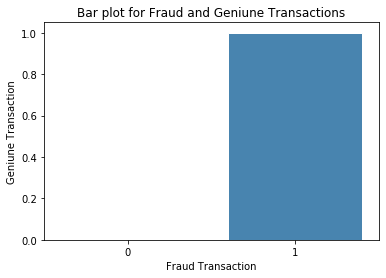

In [36]:
plt.title("Bar plot for Fraud and Geniune Transactions")
sns.barplot(x='Fraud Transaction',y='Geniune Transaction',data=plot_data,palette='Blues',edgecolor='w')

Text(0.5, 1.0, 'Time vs Amount')

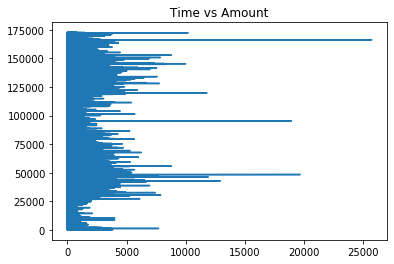

In [37]:
x=data_df['Amount']
y=data_df['Time']
plt.plot(x,y)
plt.title('Time vs Amount')

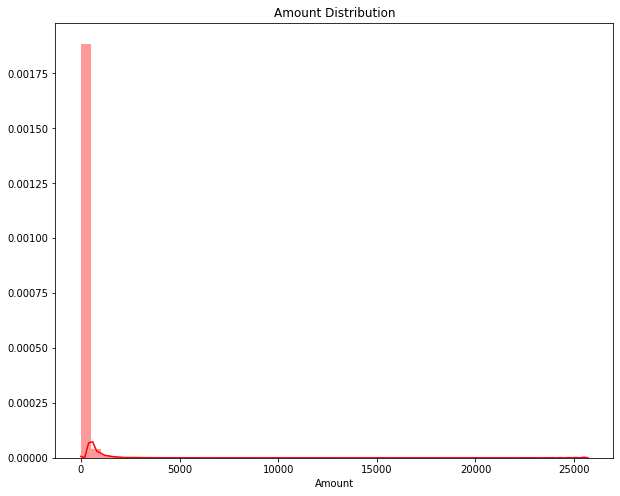

In [38]:
plt.figure(figsize=(10,8),)
plt.title('Amount Distribution')
sns.distplot(data_df['Amount'],color='red')

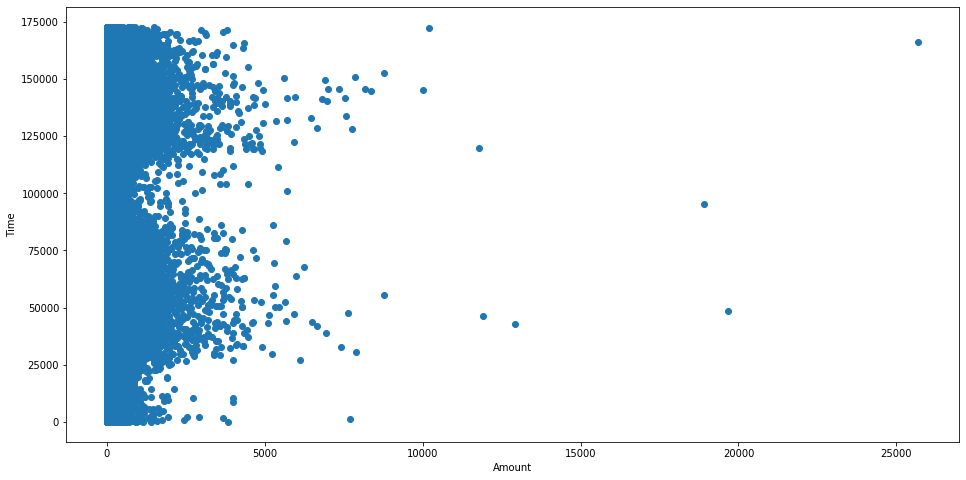

In [39]:
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(data_df['Amount'],data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

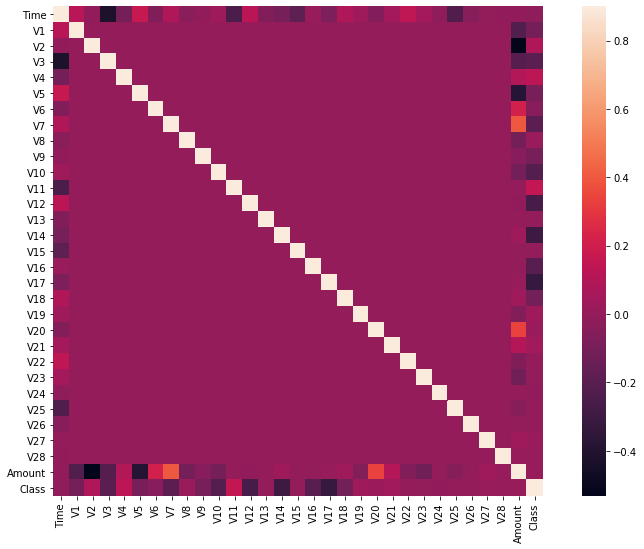

In [40]:
correlation_matrics=data_df.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrics,vmax=.9,square=True)
plt.show()

In [41]:
x=data_df.drop(['Class'],axis=1)
y=data_df['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
logisticreg=LogisticRegression()
logisticreg.fit(x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred=logisticreg.predict(x_test)

In [45]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[56829    35]
 [   44    54]]


In [46]:
accuracy=logisticreg.score(x_test,y_test)
print("accuracy score of the logistic regression model is",accuracy*100,'%')


accuracy score of the logistic regression model is 99.86131104947158 %
